### Predictive Analysis of the Patient Status of Breast Cancer Patients

#### Which feature is the greatest indicator of patient status and which is the least important. 

Import library

In [16]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
from sklearn import datasets

In [17]:
bc_df=pd.read_csv(r"C:\Users\royer\OneDrive\Desktop\breast_cancer_survival.csv")

In [18]:
bc_df=bc_df.drop(columns=["ER status","PR status"])

In [19]:
bc_df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [20]:
bc_df['Patient_Status'] = bc_df.apply(lambda x: 1 if x["Patient_Status"]=='Alive' else 0, axis=1)

Change categorical variable into numerical variable

In [22]:
categorical_col = []
for column in bc_df.columns:
    if bc_df[column].dtype == object:
        categorical_col.append(column)

In [23]:
label = LabelEncoder()
for column in categorical_col:
    bc_df[column] = label.fit_transform(bc_df[column])

In [24]:
bc_df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.952560,2.15000,0.007972,-0.048340,1,0,0,2,118,238,1
1,54,0,0.000000,1.38020,-0.498030,-0.507320,1,0,0,2,155,228,0
2,63,0,-0.523030,1.76400,-0.370190,0.010815,1,0,0,0,137,62,1
3,78,0,-0.876180,0.12943,-0.370380,0.132190,0,0,0,2,101,270,1
4,42,0,0.226110,1.74910,-0.543970,-0.390210,1,0,1,0,66,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,1,0,1,0,88,260,1
330,41,0,0.100120,-0.46547,0.472370,-0.523870,0,0,1,1,149,201,1
331,54,0,0.753820,1.64250,-0.332850,0.857860,1,0,0,3,159,103,0
332,74,0,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0,162,34,1


In [25]:
X = bc_df.drop('Patient_Status', axis=1)
y = bc_df['Patient_Status']

In [26]:
X_name=bc_df.drop('Patient_Status', axis=1).columns

In [27]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Find the best accuracy throught the max_depth from 1 to 10 by applying decision tree model

In [29]:
acc_list_train=[]
acc_list_test=[]
for x in range(1,11):
    tree_clf = DecisionTreeClassifier(random_state=42, max_depth=x)
    tree_clf.fit(X_train, y_train)
    y_pred_train = tree_clf.predict(X_train)
    accuracy_train= accuracy_score(y_train, y_pred_train )
    acc_list_train.append(accuracy_train)

    y_pred = tree_clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    acc_list_test.append(accuracy_test)
    
    #accuracy_train= accuracy_score(y_train, y_pred)
    #acc_list_train.append(accuracy_train)

In [30]:
pd.DataFrame([acc_list_train,acc_list_test],columns=range(1,11))

,1,2,3,4,5,6,7,8,9,10
0,0.808989,0.816479,0.816479,0.820225,0.850187,0.880150,0.902622,0.921348,0.928839,0.936330
1,0.835821,0.820896,0.820896,0.820896,0.835821,0.761194,0.776119,0.761194,0.761194,0.761194


Since we try to find the similar accuracy between train dataset and test dataset, the max_depth=4 has the ideal result

In [40]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

In [41]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 82.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.944444    0.811245  0.820225    0.877845      0.843173
recall      0.265625    0.995074  0.820225    0.630349      0.820225
f1-score    0.414634    0.893805  0.820225    0.654220      0.778948
support    64.000000  203.000000  0.820225  267.000000    267.000000
_______________________________________________
Confusion Matrix: 
 [[ 17  47]
 [  1 202]]



In [42]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 82.09%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.800000   0.822581  0.820896   0.811290      0.817525
recall      0.266667   0.980769  0.820896   0.623718      0.820896
f1-score    0.400000   0.894737  0.820896   0.647368      0.783975
support    15.000000  52.000000  0.820896  67.000000     67.000000
_______________________________________________
Confusion Matrix: 
 [[ 4 11]
 [ 1 51]]



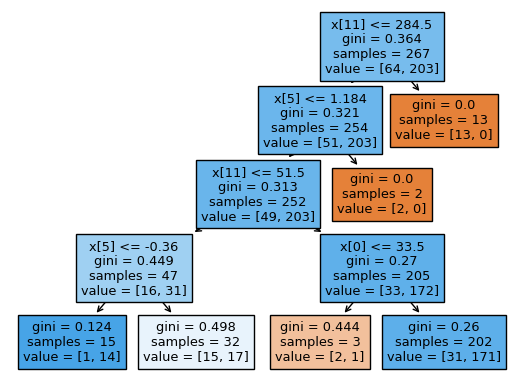

In [43]:
dd= tree.plot_tree(tree_clf, 
                #    feature_names=X.values.feature_names,  
                #    class_names=y.values.target_names,
                   filled=True)

In [35]:
fi=tree_clf.feature_importances_
fi_table=pd.DataFrame(fi)
fi_horizontal = fi_table.T
fi_horizontal.columns=[X_name]
fi_horizontal

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit
0,0.060599,0.0,0.0,0.0,0.0,0.228733,0.0,0.0,0.0,0.0,0.0,0.710668


Conclusion:We found that Date_of_Last_Visit is the most important indicator for the prediction on Patient_Status. Protein4 also slightly affect on the result.
Other variable didn't affect the prediction since their feature importance value is around 0.